<a href="https://colab.research.google.com/github/shireesha27/demo/blob/master/Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape[1:])

(28, 28)


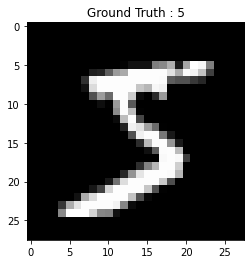

In [ ]:
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()

In [ ]:
print(train_images.shape)
print(len(train_labels))
print("First 10 labels: {0} -> {1}".format(train_labels[:10], type(train_labels[0])))

(60000, 28, 28)
60000
First 10 labels: [5 0 4 1 9 2 1 3 1 4] -> <class 'numpy.uint8'>


In [ ]:
print(test_images.shape)
print(len(test_labels))
print("First 10 labels: {0} -> {1}".format(test_labels[:10], type(test_labels[0])))

(10000, 28, 28)
10000
First 10 labels: [7 2 1 0 4 1 4 9 5 9] -> <class 'numpy.uint8'>


In [ ]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [ ]:
#The data will be reshaped so that each sample image is a row 784 columns long (28 * 28), as expected by the network.
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [ ]:
# Scaling the data
# The data will be normalized so all values are in the [0,1] interval
train_data /=255.0
test_data /=255.0

In [ ]:
# change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
# The labels will in turn be converted to a categorical type, i.e. one-hot encoded.
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
#creating the network
model = Sequential()
#Two fully connected dense layers, with the two layers using ReLU for activation 
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
#The output layer using softmax for activation.
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluating the data
# Fitting the model to the data using 10 epochs and a batch size of 128.
history = model.fit(train_data, train_labels_one_hot, batch_size=128, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2224 - accuracy: 0.9315 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0821 - accuracy: 0.9753 - val_loss: 0.0692 - val_accuracy: 0.9786
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0921 - val_accuracy: 0.9751
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.1015 - val_accuracy: 0.9739
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0738 - val_accuracy: 0.9833
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0177 - accuracy: 0.9940 - val_loss: 0.0997 - val_accuracy: 0.9807
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


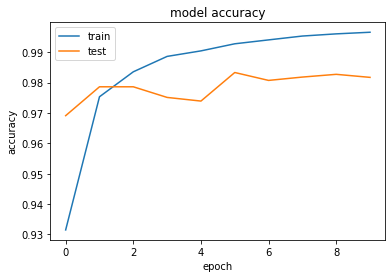

In [ ]:
# Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

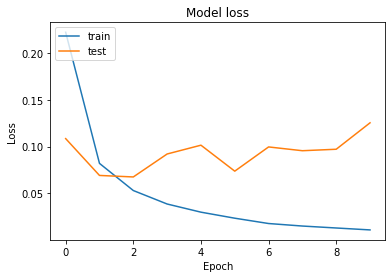

In [ ]:
# Summarize history for the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9817
Evaluation result on Test Data : Loss = 0.1254824846982956, accuracy = 0.9817000031471252


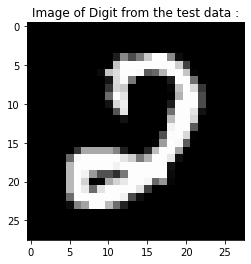

In [ ]:
#Testing the accuracy of the fitted model on the testing data set.
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index= 400
plt.imshow(test_data[image_index].reshape(28,28),cmap='gray')
plt.title('Image of Digit from the test data :')
plt.show()

In [ ]:
pred = model.predict(test_data[image_index].reshape(1,784))
print('predicted digit:', pred.argmax())
print(history.history.keys())

predicted digit: 2
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Question 3:

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

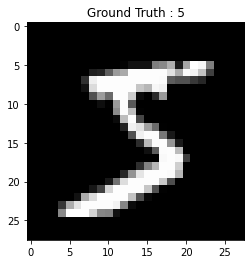

(28, 28)


In [ ]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()
print(train_images.shape[1:])

In [ ]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [ ]:
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [ ]:
#scaling the data
train_data /=255.0
test_data /=255.0

In [ ]:
#change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
# Creating the network
model = Sequential()
# Two fully connected dense layers, with the two layers using ReLU for activation 
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
# Created a Sequential model incrementally via the add() method
# Additional added a layer with 120 units of neurons
model.add(Dense(120, activation='tanh'))
#The output layer using softmax for activation.
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compiling and Fitting the test data
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# Evaluating the data
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2761 - accuracy: 0.9126 - val_loss: 0.1262 - val_accuracy: 0.9616
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9716 - val_loss: 0.0819 - val_accuracy: 0.9752
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0763 - val_accuracy: 0.9794
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0658 - val_accuracy: 0.9797
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0689 - val_accuracy: 0.9802
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0675 - val_accuracy: 0.9817
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


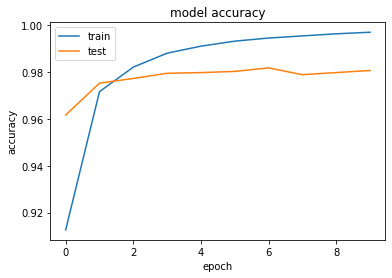

In [ ]:
# Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

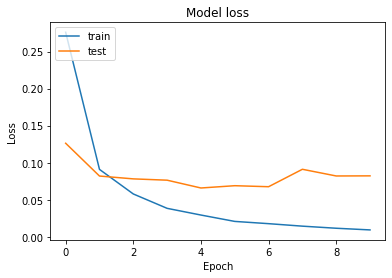

In [ ]:
# Analyze by visualizing data
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9806
Evaluation result on Test Data : Loss = 0.08218826353549957, accuracy = 0.9805999994277954


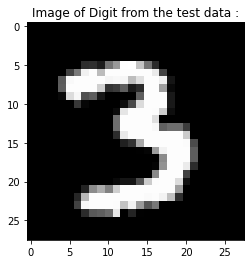

In [ ]:
# Testing the accuracy of the fitted model on the testing data set.
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index= 500
plt.imshow(test_data[image_index].reshape(28,28),cmap='gray')
plt.title('Image of Digit from the test data :')
plt.show()

In [ ]:
pred = model.predict(test_data[image_index].reshape(1,784))
print('predicted digit:', pred.argmax())
print(history.history.keys())

predicted digit: 3
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Question 4:

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

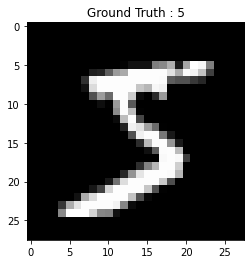

(28, 28)


In [ ]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
plt.show()
print(train_images.shape[1:])

In [ ]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single featuredimData = np.prod(train_images.shape[1:])
print(dimData)

784


In [ ]:
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [ ]:
#change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
#creating the network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(120, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compiling and Fitting the test data
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.7888 - accuracy: 0.7589 - val_loss: 0.4400 - val_accuracy: 0.8608
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3355 - accuracy: 0.8992 - val_loss: 0.2815 - val_accuracy: 0.9172
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2758 - accuracy: 0.9176 - val_loss: 0.2321 - val_accuracy: 0.9334
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2505 - accuracy: 0.9254 - val_loss: 0.2332 - val_accuracy: 0.9311
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2396 - accuracy: 0.9282 - val_loss: 0.2327 - val_accuracy: 0.9302
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2230 - accuracy: 0.9347 - val_loss: 0.2304 - val_accuracy: 0.9314
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2244 - accuracy: 0.9341 - val_loss: 0.2075 - val_accuracy: 0.9401
Epoch 

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


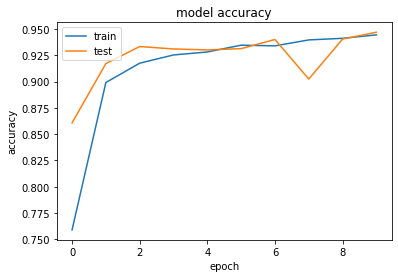

In [ ]:
# Analyze by visualizing data
# Summarize history for an accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

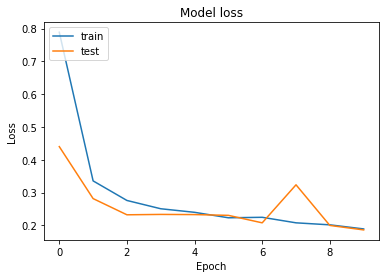

In [ ]:
# Summarize history for the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.1860 - accuracy: 0.9470
Evaluation result on Test Data : Loss = 0.18595588207244873, accuracy = 0.9470000267028809


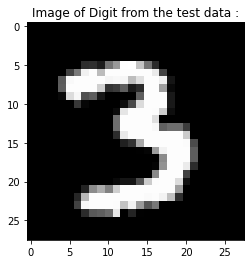

In [ ]:
# Testing the accuracy of the fitted model on the testing data set.
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
image_index= 500
plt.imshow(test_data[image_index].reshape(28,28),cmap='gray')
plt.title('Image of Digit from the test data :')
plt.show()

In [ ]:
pred = model.predict(test_data[image_index].reshape(1,784))
print('predicted digit:', pred.argmax())
print(history.history.keys())

predicted digit: 3
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
!mkdir ICP9

In [ ]:
cd ICP9

/content/ICP9


In [ ]:
from google.colab import files
upload=files.upload()

Saving Question1.py to Question1.py
